## Importing the necessary libraries

In [64]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [65]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [66]:
df.shape

(517, 31)

# EDA

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [68]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [70]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

### Outlier Detection

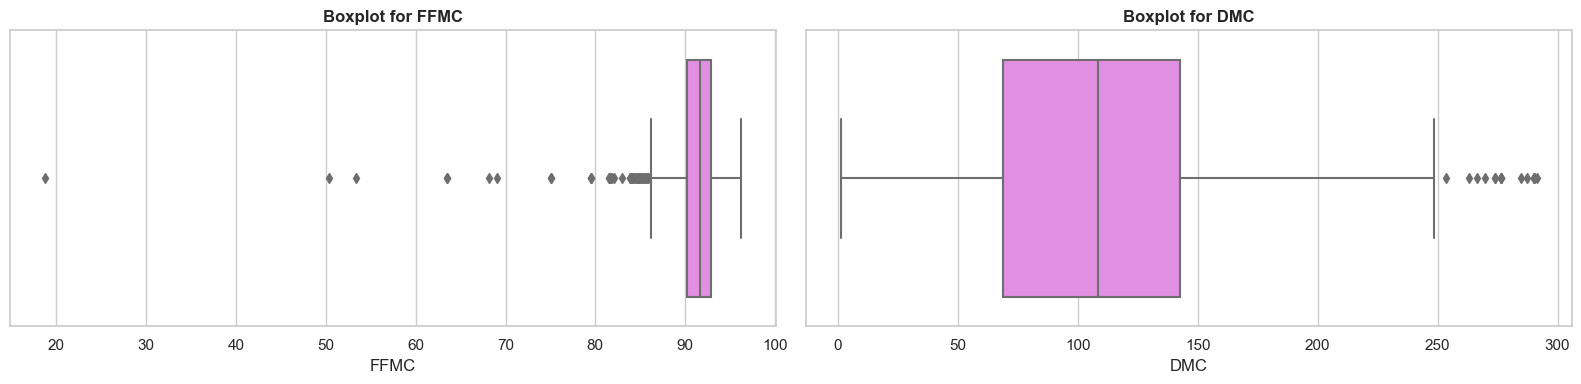

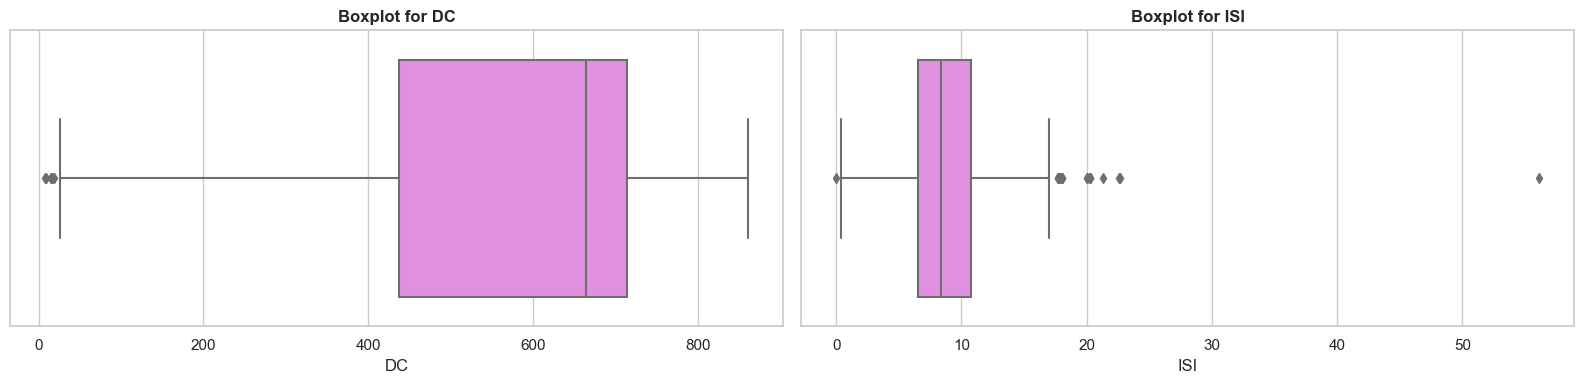

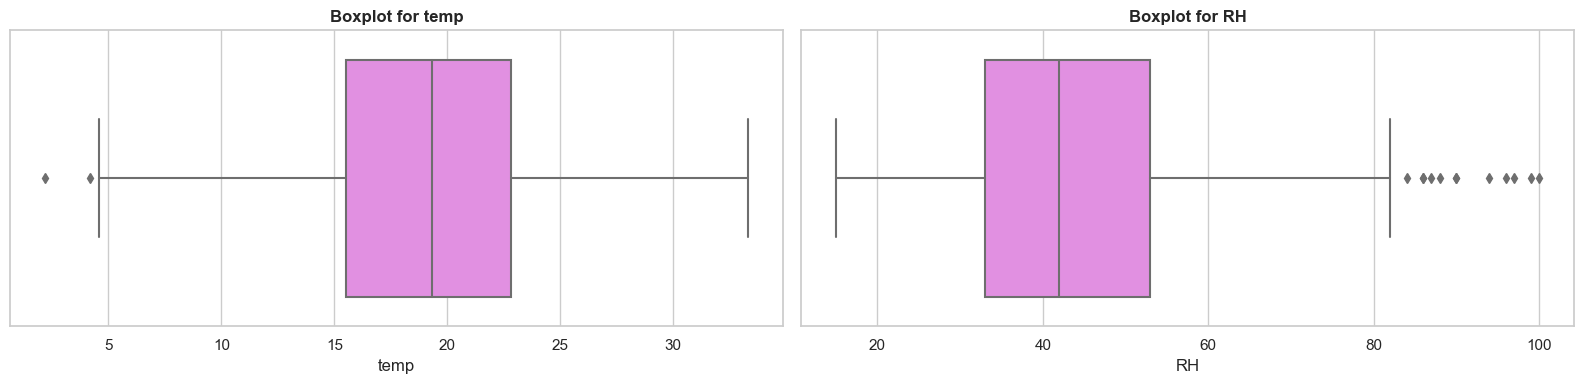

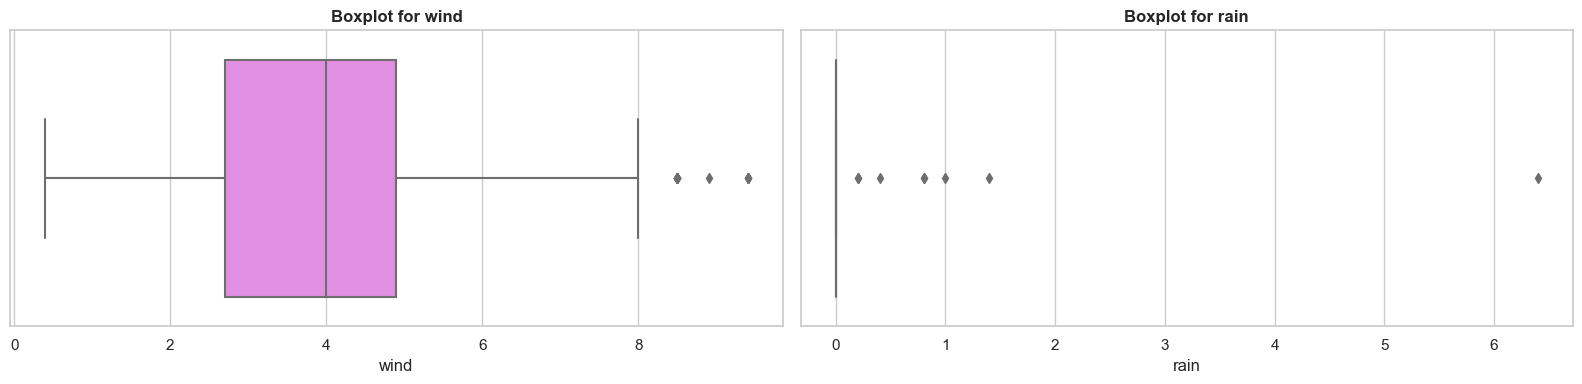

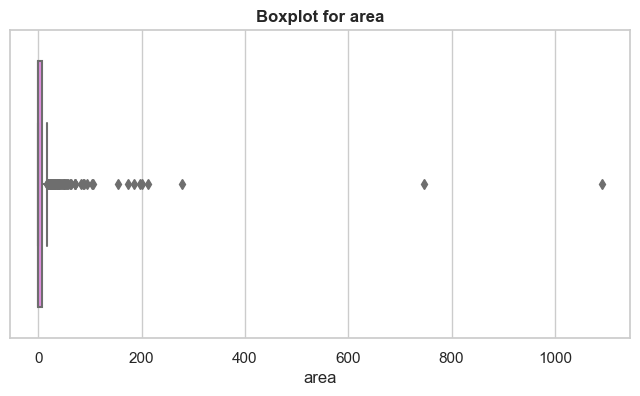

In [71]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
box_color = "violet"

num_features = len(numerical_features)

rows = num_features // 2
remaining_cols = num_features % 2

for i in range(rows):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    # Get the starting and ending indices for the current row
    start_idx = i * 2
    end_idx = min(start_idx + 2, num_features)

    # Plot the boxplots on each subplot with specified color
    for j, column in enumerate(numerical_features[start_idx:end_idx]):
        sns.boxplot(x=df[column], ax=axes[j], color=box_color)  # Use box_color here
        axes[j].set_title(f'Boxplot for {column}', fontweight='bold')  # Apply bold font weight

    plt.tight_layout()
    plt.show()

# Handle remaining columns if any (only one in this case)
if remaining_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[numerical_features[-1]], color=box_color)
    plt.title(f'Boxplot for {numerical_features[-1]}', fontweight='bold')
    plt.show()

# Data Visualization

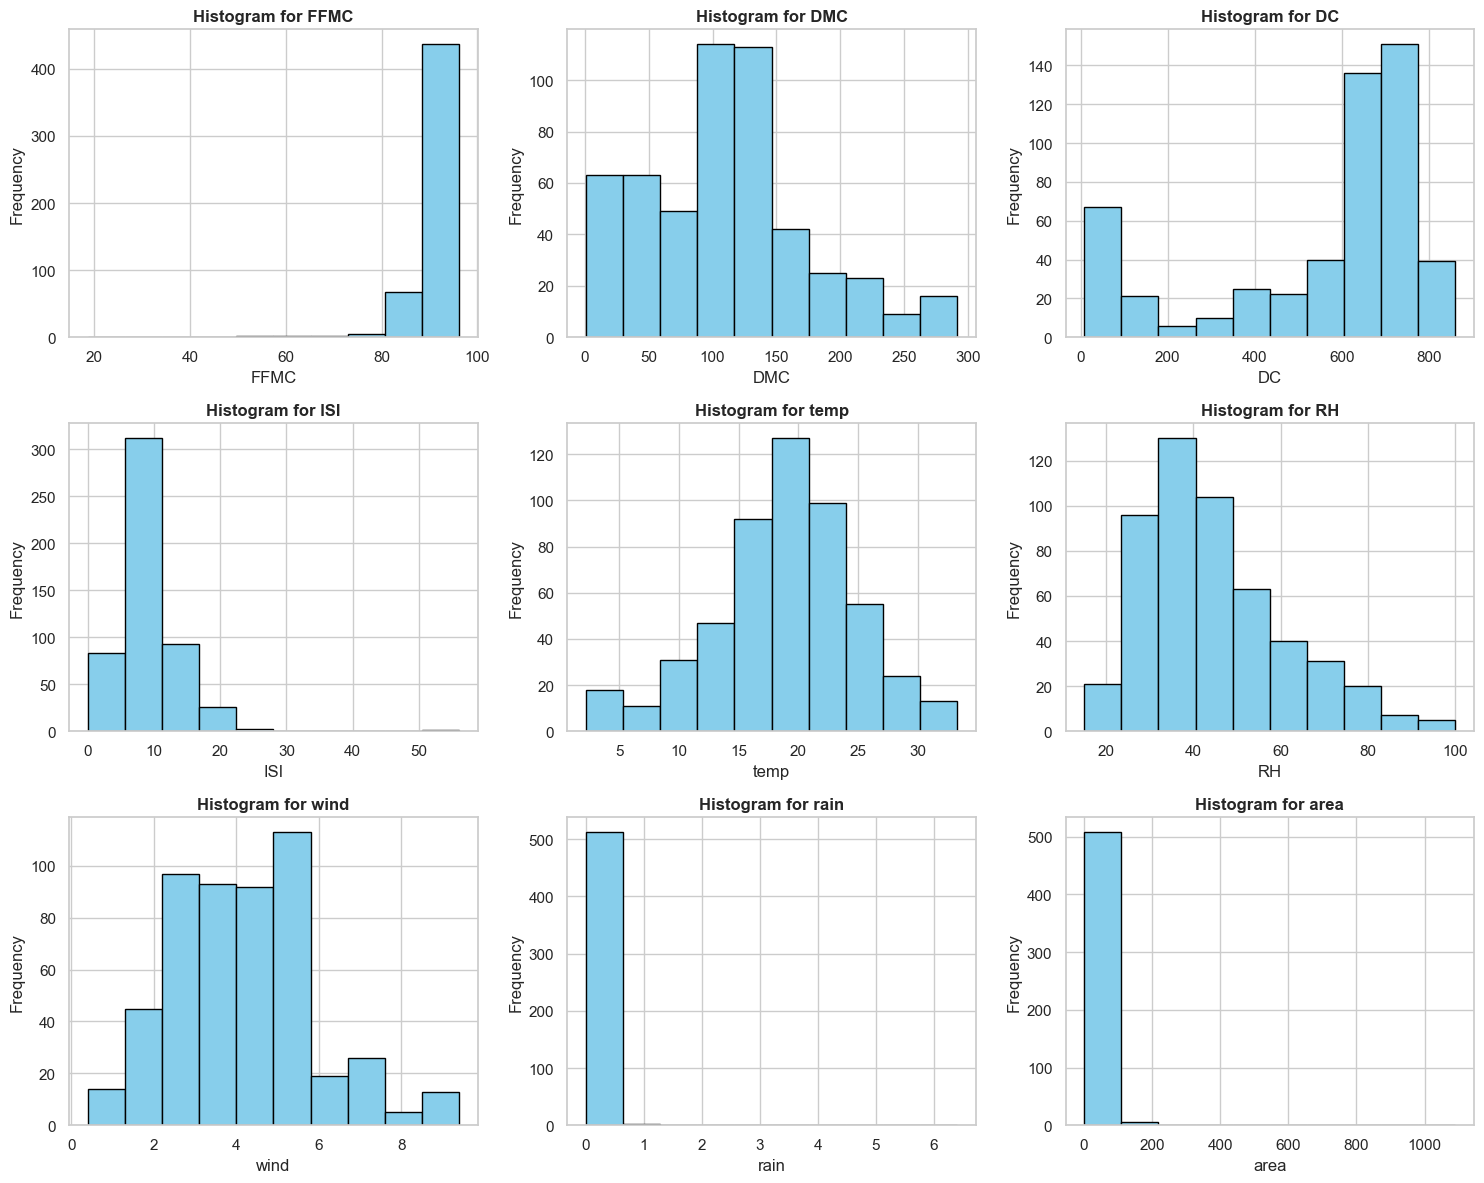

In [72]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms for all numerical features
for i, feature in enumerate(numerical_features):
    plt.sca(axes[i])  # Set the current subplot
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}', fontweight = 'bold')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


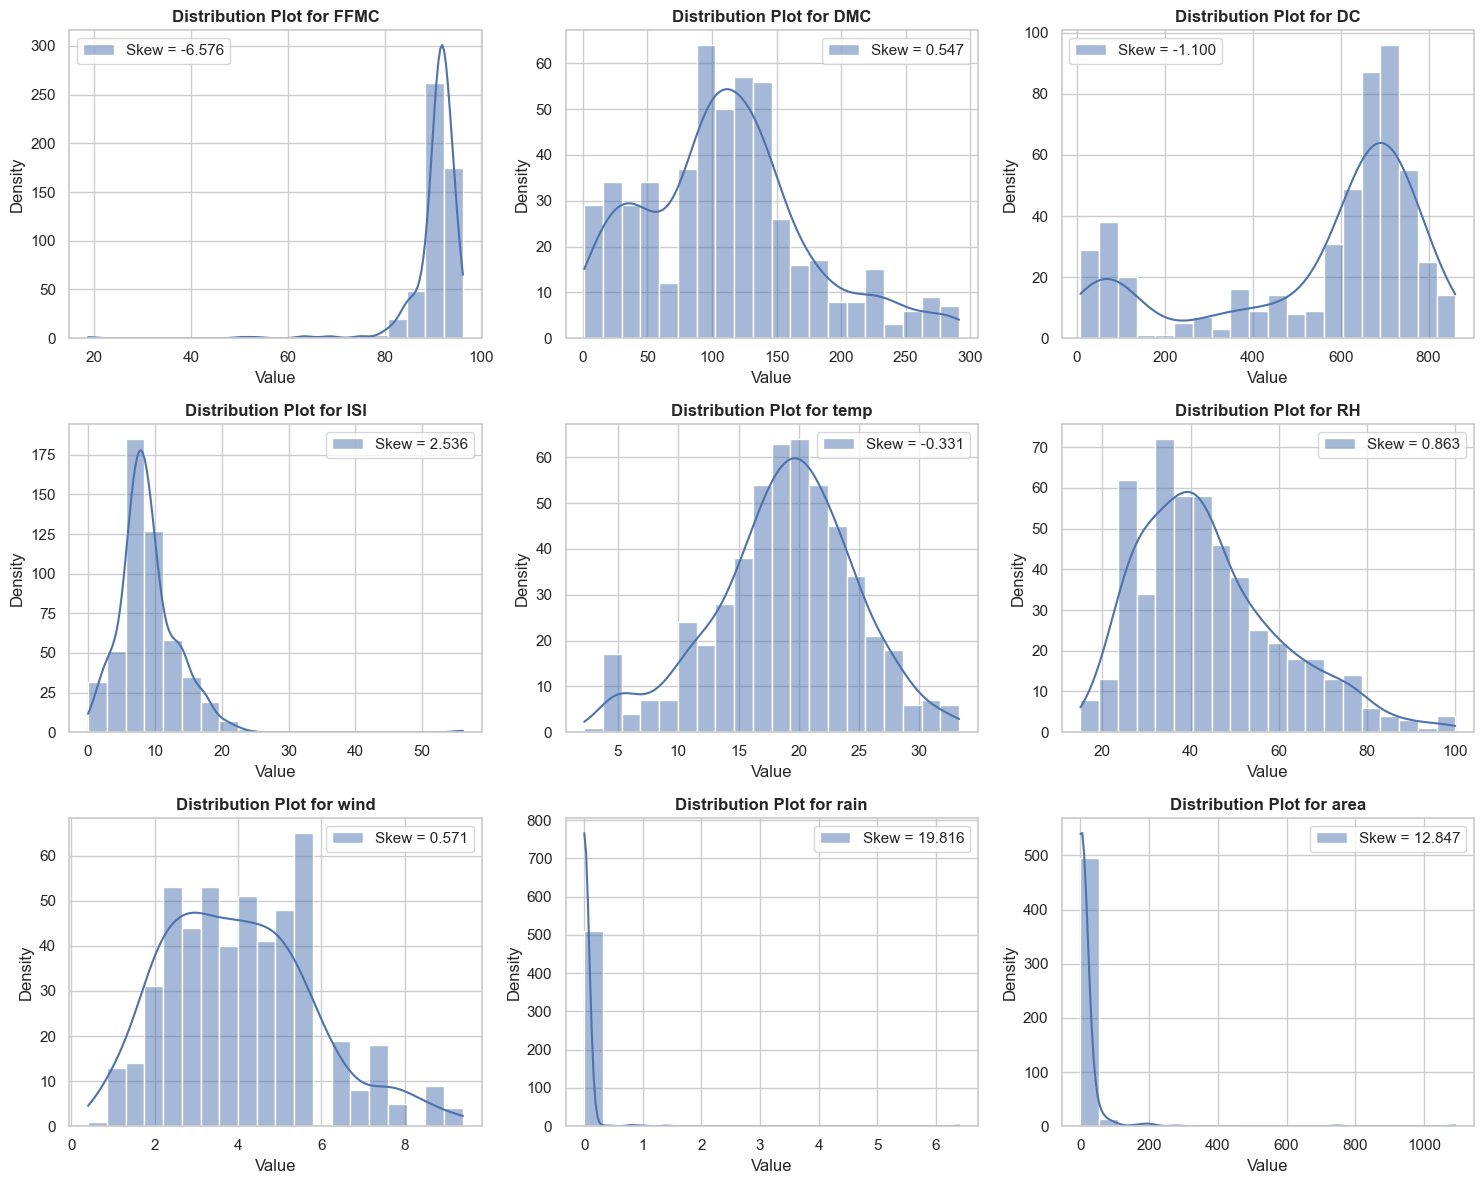

In [73]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

# Distribution plot for all numerical features
for i, feature in enumerate(numerical_features):
    skewness = df[feature].skew()

    # Use displot from seaborn for each feature
    sns.histplot(df[feature], kde=True, label=f'Skew = {skewness:.3f}', bins=20, ax=axes[i])
    axes[i].legend(loc='best')
    axes[i].set_title(f'Distribution Plot for {feature}', fontweight = 'bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


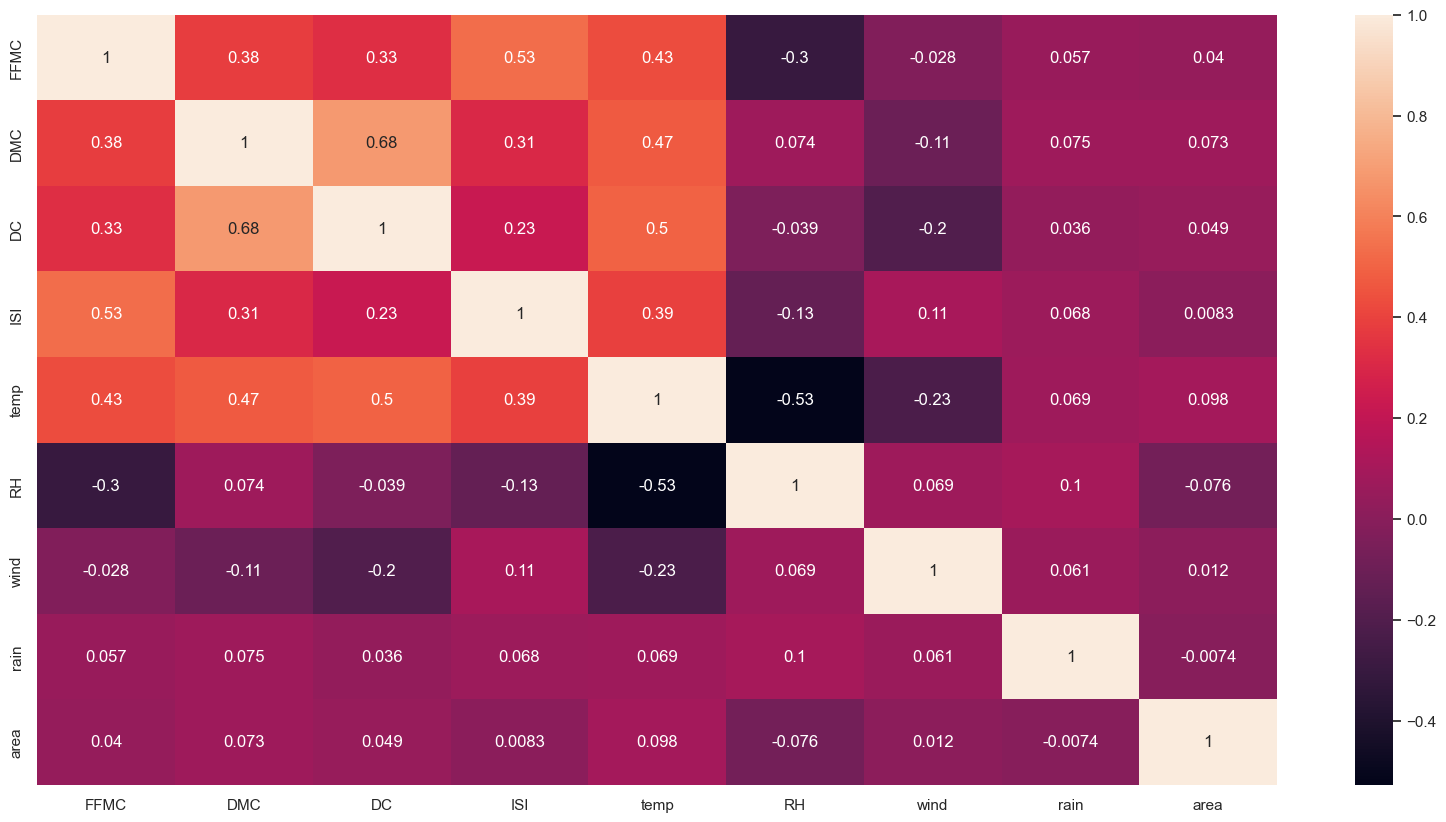

In [74]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

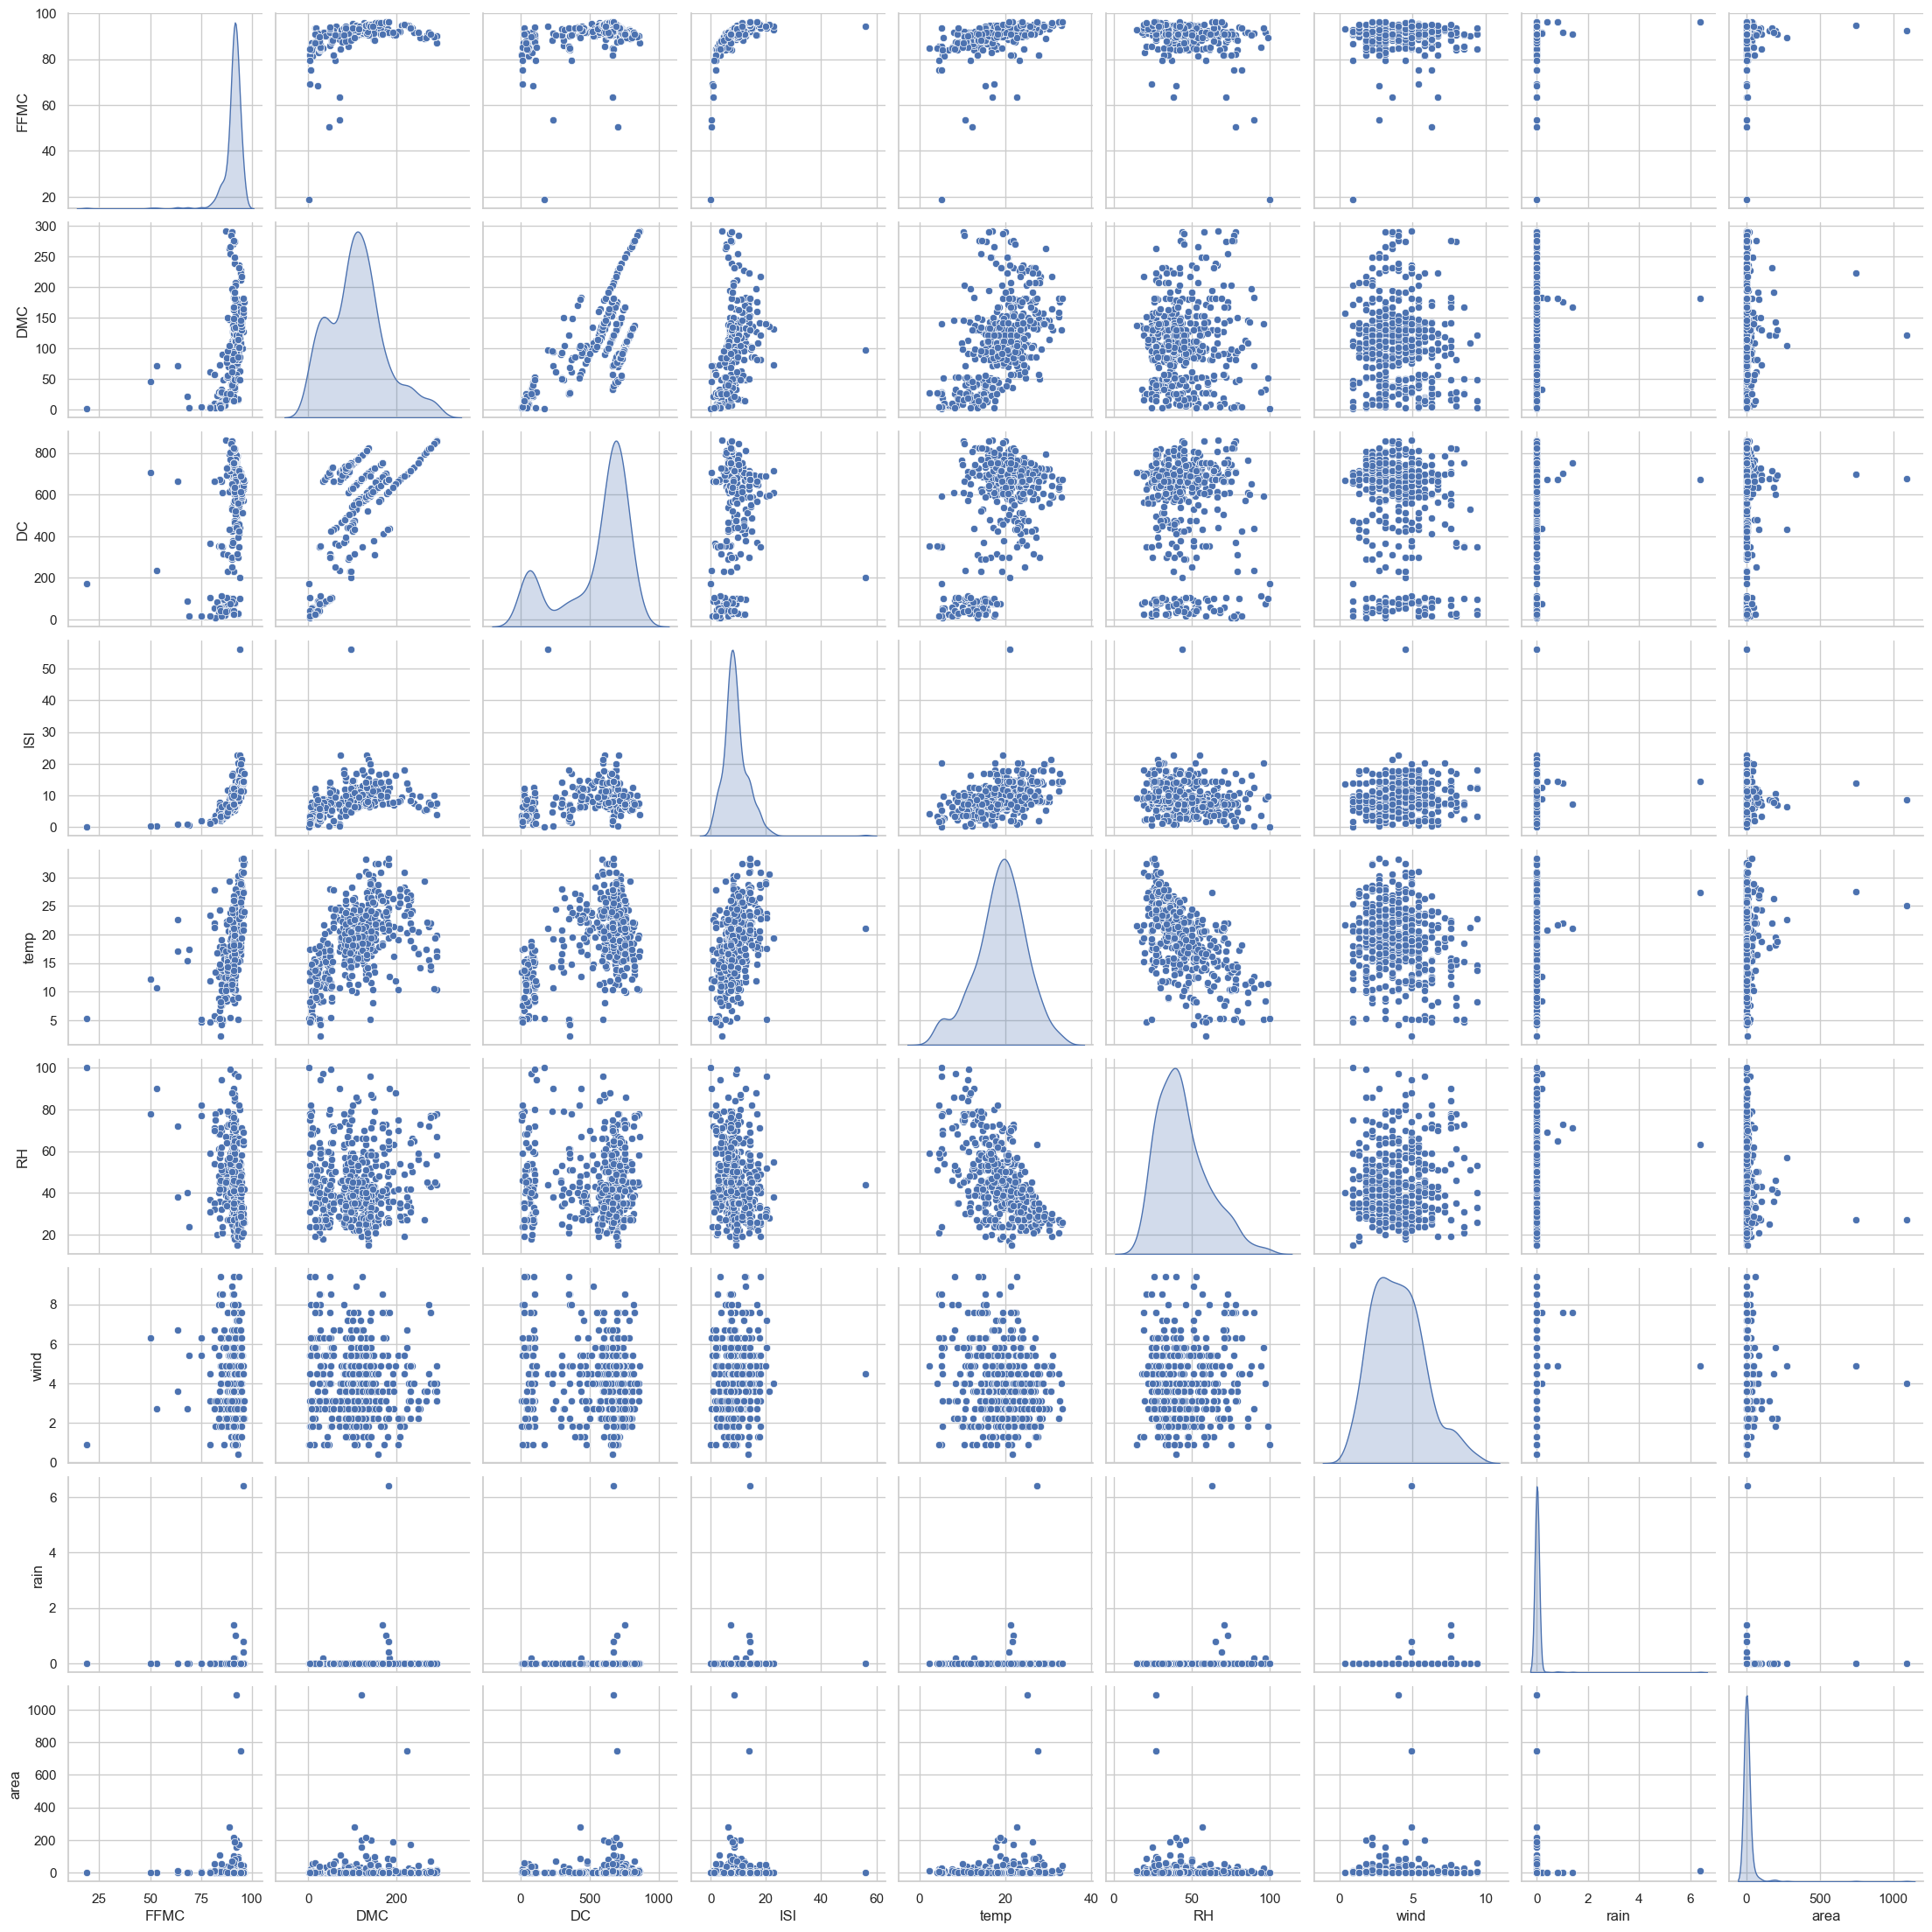

In [75]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df[numerical_features], diag_kind="kde")
plt.show()

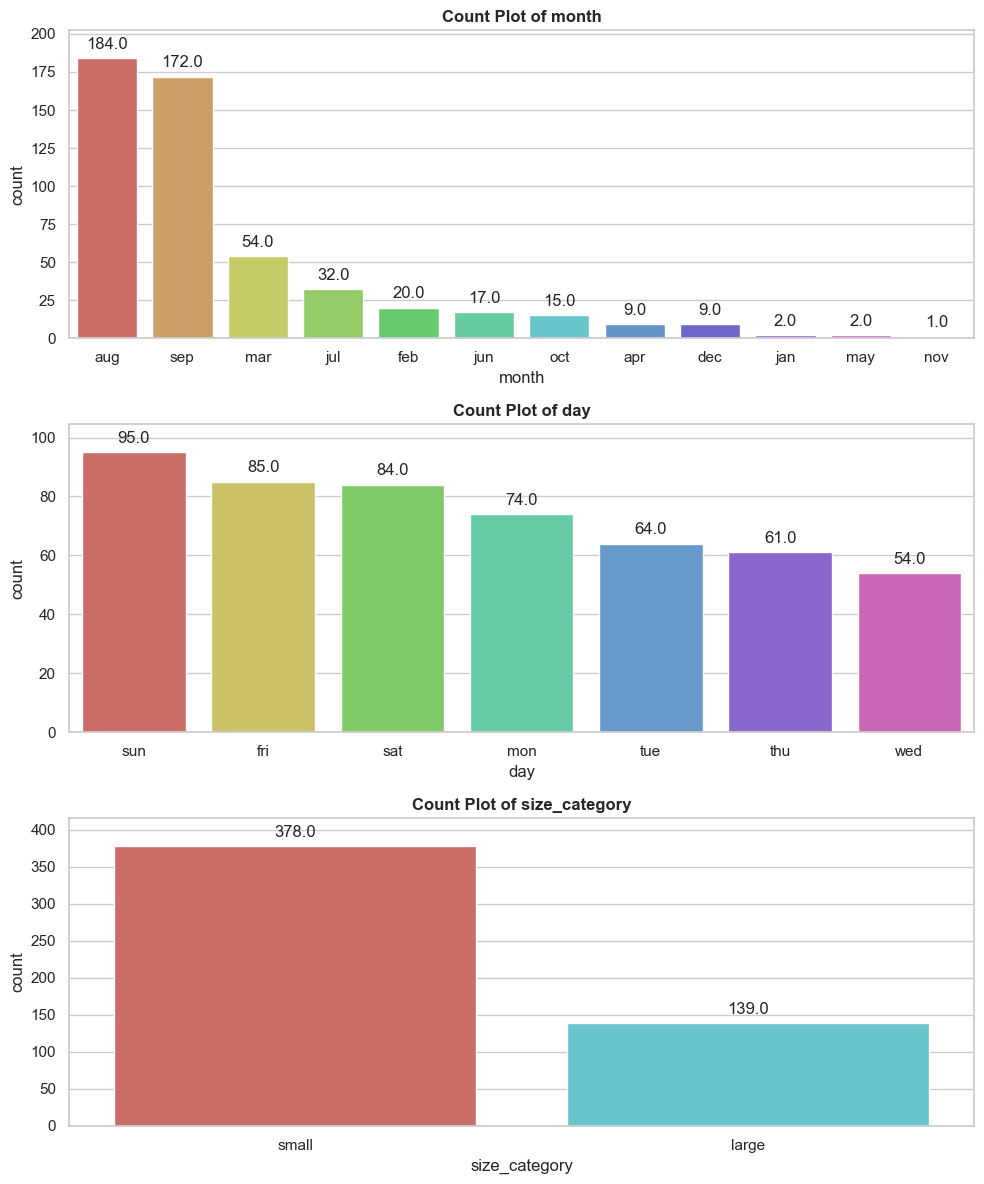

In [76]:
# Set up subplots based on the number of columns
categorical_features = ['month', 'day', 'size_category']

fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, len(categorical_features) * 4))

# Iterate through each feature and create a count plot
for i, feature in enumerate(categorical_features):
    # Get the order of categories in ascending count
    order = df[feature].value_counts().index

    sns.countplot(x=feature, data=df, ax=axes[i], palette='hls', order=order)
    axes[i].set_title(f'Count Plot of {feature}', fontweight = 'bold')

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[i].set_ylim(top=df[feature].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()


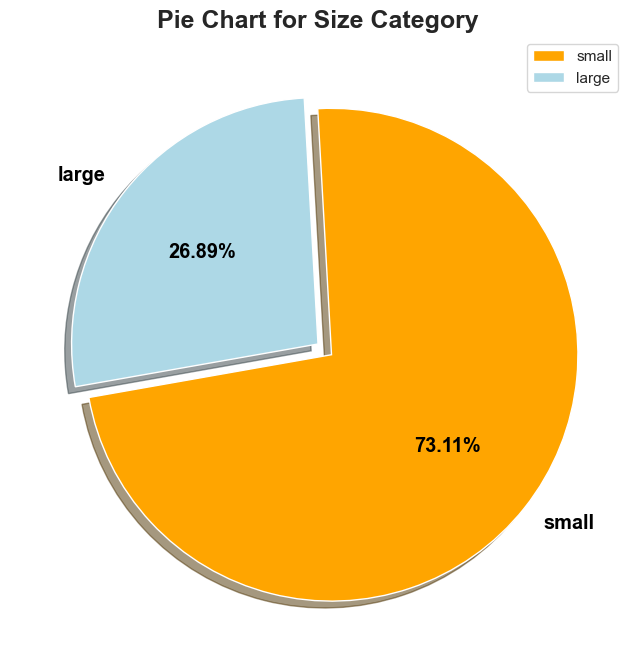

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(df['size_category'].value_counts(),
        labels=df['size_category'].unique(),
        explode=[0.07, 0.0],
        autopct='%.2f%%',
        colors=["#FFA500", "#ADD8E6"],
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'color': 'black'})
plt.legend(loc='upper right')
plt.title("Pie Chart for Size Category", fontsize=18, fontweight='bold')
plt.show()

# Data Preprocessing

In [78]:
# Label Encoding
LE = LabelEncoder()
df['size_category'] = LE.fit_transform(df['size_category'])

In [79]:
# Standardization
columns_to_scale = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
SS = StandardScaler()
df[columns_to_scale] = SS.fit_transform(df[columns_to_scale])

### Splitting the data as **X** and **Y**

In [80]:
X = df.drop(['month', 'day', 'size_category'], axis = 1)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,1,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,...,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
Y = df['size_category']
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

## Data Partition

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Building SVC models **without** Hyperparameter Tuning


## 1.Radial Basis Function (RBF)

In [83]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(X_train, Y_train)

SVC()

In [84]:
Y_train_pred = model_rbf.predict(X_train)
Y_test_pred = model_rbf.predict(X_test)

In [85]:
print('Training accuracy :', np.round(accuracy_score(Y_train, Y_train_pred),3)*100,"%")
print('Test Accuracy :', np.round(accuracy_score(Y_test, Y_test_pred),3)*100,"%")

Training accuracy : 80.30000000000001 %
Test Accuracy : 79.5 %


## 2.Linear

In [86]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, Y_train)

SVC(kernel='linear')

In [87]:
Y_train_pred = model_linear.predict(X_train)
Y_test_pred = model_linear.predict(X_test)

In [88]:
print('Training accuracy :', np.round(accuracy_score(Y_train, Y_train_pred),3)*100,"%")
print('Test Accuracy :', np.round(accuracy_score(Y_test, Y_test_pred),3)*100,"%")

Training accuracy : 90.3 %
Test Accuracy : 89.1 %


## 3. Polynomial

In [89]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(X_train, Y_train)

SVC(kernel='poly')

In [90]:
Y_train_pred = model_poly.predict(X_train)
Y_test_pred = model_poly.predict(X_test)

In [91]:
print('Training accuracy :', np.round(accuracy_score(Y_train, Y_train_pred),3)*100,"%")
print('Test Accuracy :', np.round(accuracy_score(Y_test, Y_test_pred),3)*100,"%")

Training accuracy : 79.80000000000001 %
Test Accuracy : 76.9 %


## 4.Sigmoid

In [92]:
model_sigmoid = SVC(kernel = 'sigmoid')
model_sigmoid.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [93]:
Y_train_pred = model_sigmoid.predict(X_train)
Y_test_pred = model_sigmoid.predict(X_test)

In [94]:
print('Training accuracy :', np.round(accuracy_score(Y_train, Y_train_pred),3)*100,"%")
print('Test Accuracy :', np.round(accuracy_score(Y_test, Y_test_pred),3)*100,"%")

Training accuracy : 77.0 %
Test Accuracy : 75.6 %


#     

# Building SVC model **with** Hyperparameter Tuning

## 1. Hyperparameter Tuning : **Kernel**, **C**, **Gamma**, **Degree**

In [95]:
svm_model = SVC(random_state = 42)

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 20, 50, 100, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1, 10, 5, 50],
    'degree': [2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = svm_model, param_grid = param_grid, cv=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 1024 candidates, totalling 10240 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 50, 100, 1000],
                         'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1, 0.5, 1, 10, 5, 50],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [96]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 50, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [97]:
optimal_params = list(best_params.values())
optimal_params

[50, 2, 'scale', 'linear']

In [98]:
optimal_C = optimal_params[0]
optimal_degree = optimal_params[1]
optimal_gamma = optimal_params[2]
optimal_kernel = optimal_params[3]

In [99]:
optimal_dict = {'Parameters' : ['C', 'Degree', 'Gamma', 'Kernel'],
                'Opt.Values' : [optimal_C, optimal_degree, optimal_gamma, optimal_kernel,]}

optimal_parameters = pd.DataFrame(optimal_dict)
optimal_parameters

,Parameters,Opt.Values
0,C,50
1,Degree,2
2,Gamma,scale
3,Kernel,linear


## 2.Building SVC model with optimum values of Hyperparameters

In [100]:
svc = SVC(kernel = optimal_kernel,
          degree = optimal_degree,
          gamma = optimal_gamma,
          C = optimal_C,
          random_state = 42
)

svc.fit(X_train, Y_train)

SVC(C=50, degree=2, kernel='linear', random_state=42)

In [101]:
Y_train_pred = svc.predict(X_train)
Y_test_pred = svc.predict(X_test)

In [102]:
print('Training accuracy :', np.round(accuracy_score(Y_train, Y_train_pred),3)*100,"%")
print('Test Accuracy :', np.round(accuracy_score(Y_test, Y_test_pred),3)*100,"%")

Training accuracy : 99.4 %
Test Accuracy : 98.1 %


## Model Predictions

In [103]:
#Train Predictions
Y_train_pred = svc.predict(X_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = Y_train
train_prediction['Train_predicted'] = Y_train_pred

print(train_prediction.shape)
train_prediction.head(10)

(361, 2)


,Train_Actual,Train_predicted
311,0,0
368,0,0
23,1,1
271,0,0
299,1,1
373,1,1
5,1,1
116,1,1
45,1,1
185,0,0


In [104]:
# Test Predictions
Y_test_pred = svc.predict(X_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = Y_test
test_prediction['Test_predictions'] = Y_test_pred

print(test_prediction.shape)
test_prediction.head(10)

(156, 2)


,Test_Actual,Test_predictions
304,1,1
501,1,1
441,1,1
153,1,1
503,1,1
131,1,1
204,0,0
512,0,1
325,1,1
247,1,1


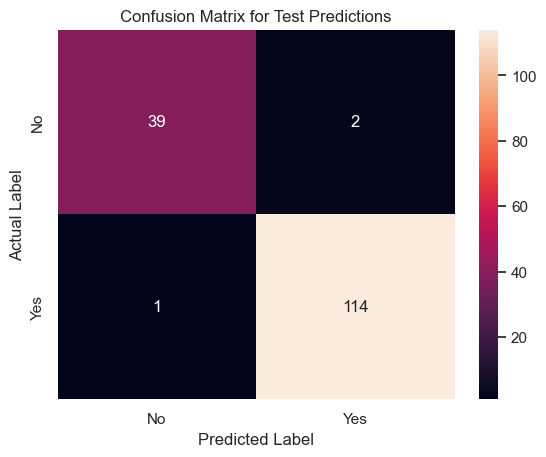

In [105]:
# confusion matrix
cm_df=confusion_matrix(Y_test, Y_test_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [106]:
print("Classification Report for Test Data  =\n", classification_report(Y_test, Y_test_pred))

Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.98      0.99      0.99       115

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.98      0.98       156

